# Deep Hedging for nonlinear generalized affine processes.

# Example: Butterfly Payoff

Import Packages

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
# import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

Define Payoff of a Butterfly option
$$
(S_{t_n}-8)^++(S_{t_n}-12)^+-2\cdot(S_{t_n}-10)^+
$$

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.7564455270767212, Loss: 0.5462995171546936
Iteration:20, Price of Hedge: 0.7465258240699768, Loss: 0.40945470333099365
Iteration:30, Price of Hedge: 0.7621188163757324, Loss: 0.4888620376586914
Iteration:40, Price of Hedge: 0.7652655839920044, Loss: 0.42890194058418274
Iteration:50, Price of Hedge: 0.7580260634422302, Loss: 0.418526291847229
Iteration:60, Price of Hedge: 0.749538779258728, Loss: 0.39145541191101074
Iteration:70, Price of Hedge: 0.7565545439720154, Loss: 0

Iteration:990, Price of Hedge: 0.7453203201293945, Loss: 0.20635104179382324
Iteration:1000, Price of Hedge: 0.749329686164856, Loss: 0.137215718626976
Iteration:1010, Price of Hedge: 0.7560470104217529, Loss: 0.18897674977779388
Iteration:1020, Price of Hedge: 0.7541375756263733, Loss: 0.15514661371707916
Iteration:1030, Price of Hedge: 0.7496532201766968, Loss: 0.19351187348365784
Iteration:1040, Price of Hedge: 0.7558658719062805, Loss: 0.16898441314697266
Iteration:1050, Price of Hedge: 0.7552088499069214, Loss: 0.14878803491592407
Iteration:1060, Price of Hedge: 0.7516384124755859, Loss: 0.13099361956119537
Iteration:1070, Price of Hedge: 0.7636529207229614, Loss: 0.20330233871936798
Iteration:1080, Price of Hedge: 0.7626940011978149, Loss: 0.15174631774425507
Iteration:1090, Price of Hedge: 0.7555894255638123, Loss: 0.164651021361351
Iteration:1100, Price of Hedge: 0.7399426698684692, Loss: 0.16982769966125488
Iteration:1110, Price of Hedge: 0.7547667026519775, Loss: 0.1756781339

Iteration:2050, Price of Hedge: 0.7361695170402527, Loss: 0.09812071174383163
Iteration:2060, Price of Hedge: 0.7416738271713257, Loss: 0.08238740265369415
Iteration:2070, Price of Hedge: 0.7453940510749817, Loss: 0.10771267116069794
Iteration:2080, Price of Hedge: 0.7481054067611694, Loss: 0.08402694761753082
Iteration:2090, Price of Hedge: 0.7467828392982483, Loss: 0.10043194890022278
Iteration:2100, Price of Hedge: 0.7466270923614502, Loss: 0.07564958184957504
Iteration:2110, Price of Hedge: 0.7426950335502625, Loss: 0.09339386224746704
Iteration:2120, Price of Hedge: 0.743808925151825, Loss: 0.09284801781177521
Iteration:2130, Price of Hedge: 0.7552661895751953, Loss: 0.11889892816543579
Iteration:2140, Price of Hedge: 0.758653461933136, Loss: 0.07980942726135254
Iteration:2150, Price of Hedge: 0.7508230805397034, Loss: 0.09394600987434387
Iteration:2160, Price of Hedge: 0.7478082776069641, Loss: 0.08195916563272476
Iteration:2170, Price of Hedge: 0.7448434233665466, Loss: 0.087903

Iteration:3110, Price of Hedge: 0.7582886815071106, Loss: 0.10244596749544144
Iteration:3120, Price of Hedge: 0.7461682558059692, Loss: 0.08746101707220078
Iteration:3130, Price of Hedge: 0.7395879626274109, Loss: 0.1002357006072998
Iteration:3140, Price of Hedge: 0.7463796138763428, Loss: 0.08408263325691223
Iteration:3150, Price of Hedge: 0.7495316863059998, Loss: 0.08679389208555222
Iteration:3160, Price of Hedge: 0.7436068654060364, Loss: 0.08441359549760818
Iteration:3170, Price of Hedge: 0.7465342283248901, Loss: 0.10404153913259506
Iteration:3180, Price of Hedge: 0.7442318797111511, Loss: 0.0838339701294899
Iteration:3190, Price of Hedge: 0.7413051128387451, Loss: 0.09976497292518616
Iteration:3200, Price of Hedge: 0.7455224394798279, Loss: 0.08650583028793335
Iteration:3210, Price of Hedge: 0.7461792230606079, Loss: 0.08910427987575531
Iteration:3220, Price of Hedge: 0.7497560977935791, Loss: 0.09339223802089691
Iteration:3230, Price of Hedge: 0.7434054613113403, Loss: 0.080317

Iteration:4170, Price of Hedge: 0.7426538467407227, Loss: 0.0784001275897026
Iteration:4180, Price of Hedge: 0.7506978511810303, Loss: 0.08204470574855804
Iteration:4190, Price of Hedge: 0.7410024404525757, Loss: 0.07884212583303452
Iteration:4200, Price of Hedge: 0.7426841855049133, Loss: 0.08974114060401917
Iteration:4210, Price of Hedge: 0.7665678262710571, Loss: 0.0965975970029831
Iteration:4220, Price of Hedge: 0.758594810962677, Loss: 0.10530848801136017
Iteration:4230, Price of Hedge: 0.7506300806999207, Loss: 0.09312040358781815
Iteration:4240, Price of Hedge: 0.7468163371086121, Loss: 0.09889721125364304
Iteration:4250, Price of Hedge: 0.7412674427032471, Loss: 0.08241952955722809
Iteration:4260, Price of Hedge: 0.7472473382949829, Loss: 0.08570059388875961
Iteration:4270, Price of Hedge: 0.752320408821106, Loss: 0.09902633726596832
Iteration:4280, Price of Hedge: 0.7495320439338684, Loss: 0.09253397583961487
Iteration:4290, Price of Hedge: 0.7492901086807251, Loss: 0.09712467

Iteration:5230, Price of Hedge: 0.7624661922454834, Loss: 0.11383114010095596
Iteration:5240, Price of Hedge: 0.7620500326156616, Loss: 0.10995164513587952
Iteration:5250, Price of Hedge: 0.7393788695335388, Loss: 0.12384168803691864
Iteration:5260, Price of Hedge: 0.728388786315918, Loss: 0.07178414613008499
Iteration:5270, Price of Hedge: 0.7567692995071411, Loss: 0.14748667180538177
Iteration:5280, Price of Hedge: 0.7667698264122009, Loss: 0.09642231464385986
Iteration:5290, Price of Hedge: 0.7546783089637756, Loss: 0.11454213410615921
Iteration:5300, Price of Hedge: 0.7344836592674255, Loss: 0.09626778215169907
Iteration:5310, Price of Hedge: 0.738789975643158, Loss: 0.0882137194275856
Iteration:5320, Price of Hedge: 0.7473811507225037, Loss: 0.10330106317996979
Iteration:5330, Price of Hedge: 0.7517598867416382, Loss: 0.11239051818847656
Iteration:5340, Price of Hedge: 0.7552679181098938, Loss: 0.09054360538721085
Iteration:5350, Price of Hedge: 0.7501196265220642, Loss: 0.0879442

Iteration:6290, Price of Hedge: 0.7542237639427185, Loss: 0.10347095131874084
Iteration:6300, Price of Hedge: 0.7523759603500366, Loss: 0.08898262679576874
Iteration:6310, Price of Hedge: 0.7604949474334717, Loss: 0.1088816449046135
Iteration:6320, Price of Hedge: 0.7606086730957031, Loss: 0.08461694419384003
Iteration:6330, Price of Hedge: 0.7384480834007263, Loss: 0.09942524880170822
Iteration:6340, Price of Hedge: 0.731670618057251, Loss: 0.09015721082687378
Iteration:6350, Price of Hedge: 0.7519867420196533, Loss: 0.09895923733711243
Iteration:6360, Price of Hedge: 0.7612149119377136, Loss: 0.08954670280218124
Iteration:6370, Price of Hedge: 0.7383187413215637, Loss: 0.10330985486507416
Iteration:6380, Price of Hedge: 0.7396569848060608, Loss: 0.07705530524253845
Iteration:6390, Price of Hedge: 0.7417093515396118, Loss: 0.09263477474451065
Iteration:6400, Price of Hedge: 0.7535817623138428, Loss: 0.06784295290708542
Iteration:6410, Price of Hedge: 0.7524037957191467, Loss: 0.091524

Iteration:7350, Price of Hedge: 0.7572557926177979, Loss: 0.10170313715934753
Iteration:7360, Price of Hedge: 0.7523536086082458, Loss: 0.08040640503168106
Iteration:7370, Price of Hedge: 0.7389211654663086, Loss: 0.09262125194072723
Iteration:7380, Price of Hedge: 0.7420706152915955, Loss: 0.10158753395080566
Iteration:7390, Price of Hedge: 0.7554916143417358, Loss: 0.09742496907711029
Iteration:7400, Price of Hedge: 0.7572547793388367, Loss: 0.08878514915704727
Iteration:7410, Price of Hedge: 0.7496311068534851, Loss: 0.11225525289773941
Iteration:7420, Price of Hedge: 0.7439924478530884, Loss: 0.10836877673864365
Iteration:7430, Price of Hedge: 0.7455561757087708, Loss: 0.1038767471909523
Iteration:7440, Price of Hedge: 0.7575312256813049, Loss: 0.10223450511693954
Iteration:7450, Price of Hedge: 0.7447793483734131, Loss: 0.10221303999423981
Iteration:7460, Price of Hedge: 0.7519873380661011, Loss: 0.08733433485031128
Iteration:7470, Price of Hedge: 0.7565396428108215, Loss: 0.08080

Iteration:8410, Price of Hedge: 0.7545357942581177, Loss: 0.09716721624135971
Iteration:8420, Price of Hedge: 0.7549760341644287, Loss: 0.06760942935943604
Iteration:8430, Price of Hedge: 0.7524911761283875, Loss: 0.0737312063574791
Iteration:8440, Price of Hedge: 0.7573850154876709, Loss: 0.06693573296070099
Iteration:8450, Price of Hedge: 0.7508518695831299, Loss: 0.08416447043418884
Iteration:8460, Price of Hedge: 0.7350655794143677, Loss: 0.08949412405490875
Iteration:8470, Price of Hedge: 0.7412617206573486, Loss: 0.07899768650531769
Iteration:8480, Price of Hedge: 0.7510814070701599, Loss: 0.09290879964828491
Iteration:8490, Price of Hedge: 0.7606114149093628, Loss: 0.09160523861646652
Iteration:8500, Price of Hedge: 0.7401642799377441, Loss: 0.09971276670694351
Iteration:8510, Price of Hedge: 0.7492393255233765, Loss: 0.1062125638127327
Iteration:8520, Price of Hedge: 0.7514365911483765, Loss: 0.09451261907815933
Iteration:8530, Price of Hedge: 0.7495953440666199, Loss: 0.099370

Iteration:9470, Price of Hedge: 0.7458271384239197, Loss: 0.10383980721235275
Iteration:9480, Price of Hedge: 0.7411576509475708, Loss: 0.08575741201639175
Iteration:9490, Price of Hedge: 0.7357037663459778, Loss: 0.08757689595222473
Iteration:9500, Price of Hedge: 0.7476932406425476, Loss: 0.08200673758983612
Iteration:9510, Price of Hedge: 0.7480412721633911, Loss: 0.09138646721839905
Iteration:9520, Price of Hedge: 0.751303493976593, Loss: 0.08237715065479279
Iteration:9530, Price of Hedge: 0.7598073482513428, Loss: 0.08181072771549225
Iteration:9540, Price of Hedge: 0.7425194382667542, Loss: 0.0785314068198204
Iteration:9550, Price of Hedge: 0.7420296669006348, Loss: 0.07053520530462265
Iteration:9560, Price of Hedge: 0.7556977868080139, Loss: 0.08918875455856323
Iteration:9570, Price of Hedge: 0.7516276240348816, Loss: 0.12070802599191666
Iteration:9580, Price of Hedge: 0.7498692870140076, Loss: 0.10191542655229568
Iteration:9590, Price of Hedge: 0.7610836029052734, Loss: 0.092170

In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_butterfly.h5')

Illustrate the computed hedging strategy

In [77]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

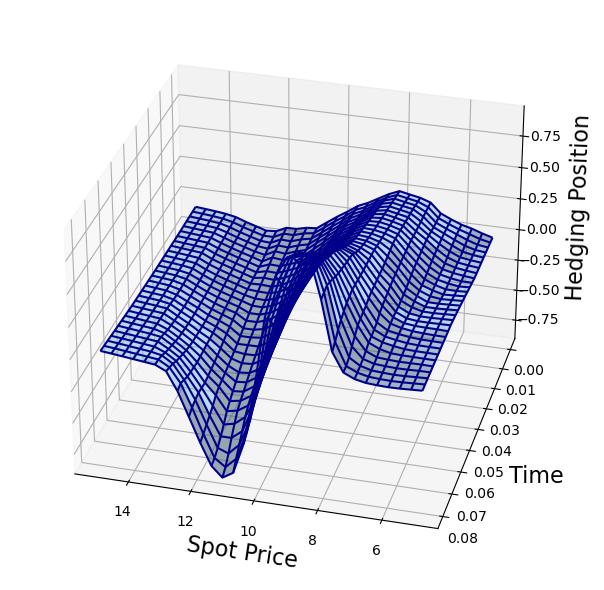

In [65]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue",alpha = 0.5)
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()

#plt.legend()
plt.savefig('eps/fig_butterfly_hedge_3d.eps', format='eps')
plt.show()

Depict the Hedging Error

In [17]:
BATCH_SIZE = 10000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


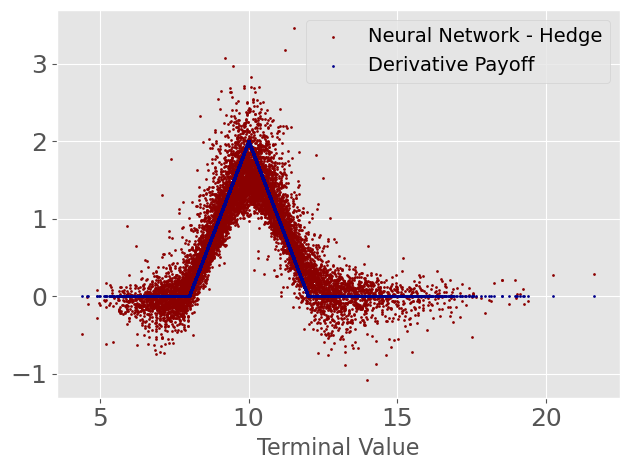

In [43]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_hedging_mc.eps', format='eps')
plt.show()


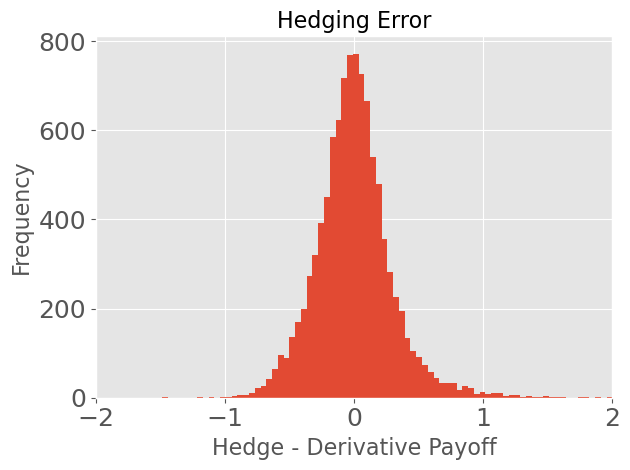

In [31]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_histogram.eps', format='eps')
plt.show()

Save the model

In [9]:
hedge.save("model_butterfly.h5")

# Training of a hedging strategy with fixed Parameters

Specify setting and compute the non-robust hedge.

In [67]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.9233896732330322, Loss: 0.45745909214019775
Iteration:20, Price of Hedge: 0.914421558380127, Loss: 0.4336940348148346
Iteration:30, Price of Hedge: 0.9059486985206604, Loss: 0.3938404321670532
Iteration:40, Price of Hedge: 0.8924297094345093, Loss: 0.40473467111587524
Iteration:50, Price of Hedge: 0.8873634934425354, Loss: 0.36454224586486816
Iteration:60, Price of Hedge: 0.8883089423179626, Loss: 0.3718383014202118
Iteration:70, Price of Hedge: 0.8879300951957703, Loss: 

Iteration:990, Price of Hedge: 0.8989322185516357, Loss: 0.08955799788236618
Iteration:1000, Price of Hedge: 0.8966526389122009, Loss: 0.08757568150758743
Iteration:1010, Price of Hedge: 0.8964880108833313, Loss: 0.0718679204583168
Iteration:1020, Price of Hedge: 0.8951730728149414, Loss: 0.07663712650537491
Iteration:1030, Price of Hedge: 0.8940393328666687, Loss: 0.09154031425714493
Iteration:1040, Price of Hedge: 0.896424412727356, Loss: 0.07955522835254669
Iteration:1050, Price of Hedge: 0.8944047093391418, Loss: 0.05826820805668831
Iteration:1060, Price of Hedge: 0.8981512784957886, Loss: 0.06339208036661148
Iteration:1070, Price of Hedge: 0.900284469127655, Loss: 0.07592306286096573
Iteration:1080, Price of Hedge: 0.9025256633758545, Loss: 0.0731695294380188
Iteration:1090, Price of Hedge: 0.9025915265083313, Loss: 0.0959094762802124
Iteration:1100, Price of Hedge: 0.8951389193534851, Loss: 0.05391957610845566
Iteration:1110, Price of Hedge: 0.8906164765357971, Loss: 0.0609921626

Iteration:2040, Price of Hedge: 0.9005506634712219, Loss: 0.03514941409230232
Iteration:2050, Price of Hedge: 0.9055750966072083, Loss: 0.03750516101717949
Iteration:2060, Price of Hedge: 0.8940666913986206, Loss: 0.03731318190693855
Iteration:2070, Price of Hedge: 0.89072185754776, Loss: 0.034209370613098145
Iteration:2080, Price of Hedge: 0.8978862762451172, Loss: 0.03921842947602272
Iteration:2090, Price of Hedge: 0.9023644328117371, Loss: 0.03443373367190361
Iteration:2100, Price of Hedge: 0.900789201259613, Loss: 0.04032298922538757
Iteration:2110, Price of Hedge: 0.8917067050933838, Loss: 0.03527707979083061
Iteration:2120, Price of Hedge: 0.8884204626083374, Loss: 0.038081616163253784
Iteration:2130, Price of Hedge: 0.900791585445404, Loss: 0.04148293659090996
Iteration:2140, Price of Hedge: 0.9039992690086365, Loss: 0.032242655754089355
Iteration:2150, Price of Hedge: 0.8945111036300659, Loss: 0.04603886604309082
Iteration:2160, Price of Hedge: 0.9018422961235046, Loss: 0.02998

Iteration:3090, Price of Hedge: 0.8939052820205688, Loss: 0.03699173033237457
Iteration:3100, Price of Hedge: 0.9004852771759033, Loss: 0.04407193511724472
Iteration:3110, Price of Hedge: 0.9036291241645813, Loss: 0.04238682985305786
Iteration:3120, Price of Hedge: 0.8999110460281372, Loss: 0.05440114438533783
Iteration:3130, Price of Hedge: 0.9034130573272705, Loss: 0.036939315497875214
Iteration:3140, Price of Hedge: 0.8991069793701172, Loss: 0.03349879011511803
Iteration:3150, Price of Hedge: 0.9075533151626587, Loss: 0.026655668392777443
Iteration:3160, Price of Hedge: 0.9047479033470154, Loss: 0.032351426780223846
Iteration:3170, Price of Hedge: 0.8949873447418213, Loss: 0.03953472152352333
Iteration:3180, Price of Hedge: 0.8976685404777527, Loss: 0.03292473405599594
Iteration:3190, Price of Hedge: 0.9061000347137451, Loss: 0.04266690835356712
Iteration:3200, Price of Hedge: 0.8904464840888977, Loss: 0.03994090110063553
Iteration:3210, Price of Hedge: 0.8968209624290466, Loss: 0.0

Iteration:4140, Price of Hedge: 0.891859769821167, Loss: 0.05067737400531769
Iteration:4150, Price of Hedge: 0.9096909761428833, Loss: 0.030718067660927773
Iteration:4160, Price of Hedge: 0.9000931978225708, Loss: 0.028194360435009003
Iteration:4170, Price of Hedge: 0.8974977135658264, Loss: 0.04077497869729996
Iteration:4180, Price of Hedge: 0.9024777412414551, Loss: 0.04551100730895996
Iteration:4190, Price of Hedge: 0.8977894186973572, Loss: 0.05870052054524422
Iteration:4200, Price of Hedge: 0.8899186253547668, Loss: 0.042101506143808365
Iteration:4210, Price of Hedge: 0.9084872007369995, Loss: 0.0323358029127121
Iteration:4220, Price of Hedge: 0.8989903330802917, Loss: 0.031872186809778214
Iteration:4230, Price of Hedge: 0.8954077959060669, Loss: 0.029415585100650787
Iteration:4240, Price of Hedge: 0.902987003326416, Loss: 0.039626117795705795
Iteration:4250, Price of Hedge: 0.898978590965271, Loss: 0.03410620614886284
Iteration:4260, Price of Hedge: 0.8939473032951355, Loss: 0.03

Iteration:5190, Price of Hedge: 0.8913074135780334, Loss: 0.028156258165836334
Iteration:5200, Price of Hedge: 0.8911553621292114, Loss: 0.03653736785054207
Iteration:5210, Price of Hedge: 0.9040679931640625, Loss: 0.03557946905493736
Iteration:5220, Price of Hedge: 0.9011572003364563, Loss: 0.031209491193294525
Iteration:5230, Price of Hedge: 0.8897605538368225, Loss: 0.026616623625159264
Iteration:5240, Price of Hedge: 0.8912731409072876, Loss: 0.04185206815600395
Iteration:5250, Price of Hedge: 0.9015809297561646, Loss: 0.028462983667850494
Iteration:5260, Price of Hedge: 0.8979139924049377, Loss: 0.027885597199201584
Iteration:5270, Price of Hedge: 0.8967785835266113, Loss: 0.05562543123960495
Iteration:5280, Price of Hedge: 0.8891955614089966, Loss: 0.0383525975048542
Iteration:5290, Price of Hedge: 0.8982224464416504, Loss: 0.03801844269037247
Iteration:5300, Price of Hedge: 0.8982881903648376, Loss: 0.03245070204138756
Iteration:5310, Price of Hedge: 0.8975663781166077, Loss: 0.

Iteration:6240, Price of Hedge: 0.8921754956245422, Loss: 0.040461465716362
Iteration:6250, Price of Hedge: 0.8889742493629456, Loss: 0.03525259718298912
Iteration:6260, Price of Hedge: 0.9043944478034973, Loss: 0.03495112434029579
Iteration:6270, Price of Hedge: 0.889054536819458, Loss: 0.031544286757707596
Iteration:6280, Price of Hedge: 0.884891927242279, Loss: 0.035013988614082336
Iteration:6290, Price of Hedge: 0.903419017791748, Loss: 0.03716606646776199
Iteration:6300, Price of Hedge: 0.909724771976471, Loss: 0.039528973400592804
Iteration:6310, Price of Hedge: 0.9019441604614258, Loss: 0.03190738335251808
Iteration:6320, Price of Hedge: 0.8983249664306641, Loss: 0.02731761708855629
Iteration:6330, Price of Hedge: 0.8976684808731079, Loss: 0.03146195039153099
Iteration:6340, Price of Hedge: 0.9012871384620667, Loss: 0.03832435980439186
Iteration:6350, Price of Hedge: 0.8959043622016907, Loss: 0.033654481172561646
Iteration:6360, Price of Hedge: 0.8997175693511963, Loss: 0.052128

Iteration:7290, Price of Hedge: 0.896139919757843, Loss: 0.03897488862276077
Iteration:7300, Price of Hedge: 0.894770085811615, Loss: 0.039589472115039825
Iteration:7310, Price of Hedge: 0.9000943899154663, Loss: 0.041722364723682404
Iteration:7320, Price of Hedge: 0.8903553485870361, Loss: 0.04323373734951019
Iteration:7330, Price of Hedge: 0.8934829831123352, Loss: 0.027300652116537094
Iteration:7340, Price of Hedge: 0.8974971771240234, Loss: 0.02460932731628418
Iteration:7350, Price of Hedge: 0.8975076079368591, Loss: 0.04697257652878761
Iteration:7360, Price of Hedge: 0.8981794714927673, Loss: 0.027776207774877548
Iteration:7370, Price of Hedge: 0.9009273052215576, Loss: 0.03549779951572418
Iteration:7380, Price of Hedge: 0.8971014618873596, Loss: 0.029433459043502808
Iteration:7390, Price of Hedge: 0.8965674638748169, Loss: 0.029653459787368774
Iteration:7400, Price of Hedge: 0.890440046787262, Loss: 0.04244987666606903
Iteration:7410, Price of Hedge: 0.8998034596443176, Loss: 0.0

Iteration:8340, Price of Hedge: 0.8924577236175537, Loss: 0.03296327590942383
Iteration:8350, Price of Hedge: 0.9006579518318176, Loss: 0.02883613109588623
Iteration:8360, Price of Hedge: 0.8917102813720703, Loss: 0.032216623425483704
Iteration:8370, Price of Hedge: 0.8942872881889343, Loss: 0.03123302385210991
Iteration:8380, Price of Hedge: 0.9016067385673523, Loss: 0.04138301685452461
Iteration:8390, Price of Hedge: 0.8971037268638611, Loss: 0.03253558650612831
Iteration:8400, Price of Hedge: 0.8952924609184265, Loss: 0.03616897389292717
Iteration:8410, Price of Hedge: 0.8977296352386475, Loss: 0.02897350862622261
Iteration:8420, Price of Hedge: 0.8908439874649048, Loss: 0.02974739298224449
Iteration:8430, Price of Hedge: 0.9022454023361206, Loss: 0.02849203534424305
Iteration:8440, Price of Hedge: 0.8979714512825012, Loss: 0.03239252045750618
Iteration:8450, Price of Hedge: 0.8920919299125671, Loss: 0.03902677446603775
Iteration:8460, Price of Hedge: 0.8936205506324768, Loss: 0.051

Iteration:9390, Price of Hedge: 0.8912699222564697, Loss: 0.030343731865286827
Iteration:9400, Price of Hedge: 0.8955278992652893, Loss: 0.025341195985674858
Iteration:9410, Price of Hedge: 0.8962505459785461, Loss: 0.037092410027980804
Iteration:9420, Price of Hedge: 0.9006721377372742, Loss: 0.031125206500291824
Iteration:9430, Price of Hedge: 0.9006690382957458, Loss: 0.03053189627826214
Iteration:9440, Price of Hedge: 0.902199387550354, Loss: 0.031123481690883636
Iteration:9450, Price of Hedge: 0.8956649899482727, Loss: 0.03506093472242355
Iteration:9460, Price of Hedge: 0.8949655294418335, Loss: 0.027881909161806107
Iteration:9470, Price of Hedge: 0.8964443802833557, Loss: 0.029670266434550285
Iteration:9480, Price of Hedge: 0.9026188254356384, Loss: 0.03904878348112106
Iteration:9490, Price of Hedge: 0.9014087319374084, Loss: 0.03481847420334816
Iteration:9500, Price of Hedge: 0.8936402797698975, Loss: 0.02332758530974388
Iteration:9510, Price of Hedge: 0.8977901935577393, Loss: 

Display the non-robust hedge.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

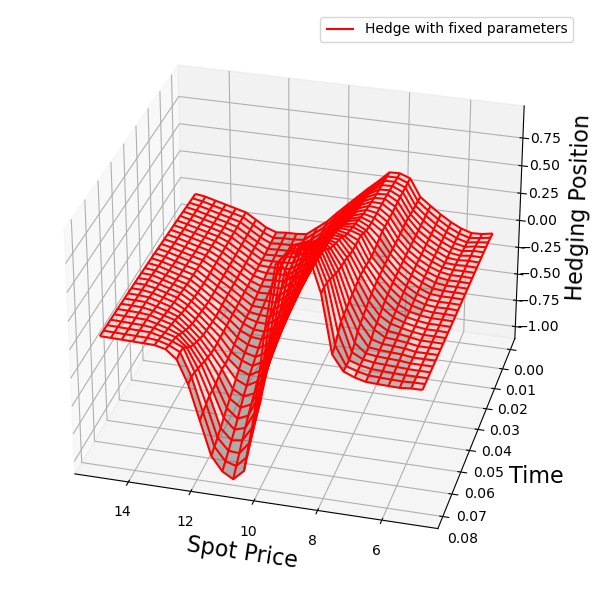

In [69]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose",alpha = 0.5)
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_butterfly_uncertain_fix.eps', format='eps')
plt.show()

# Comparison with robust strategy

In [70]:
style.use('ggplot')
BATCH_SIZE = 10000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\julia\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


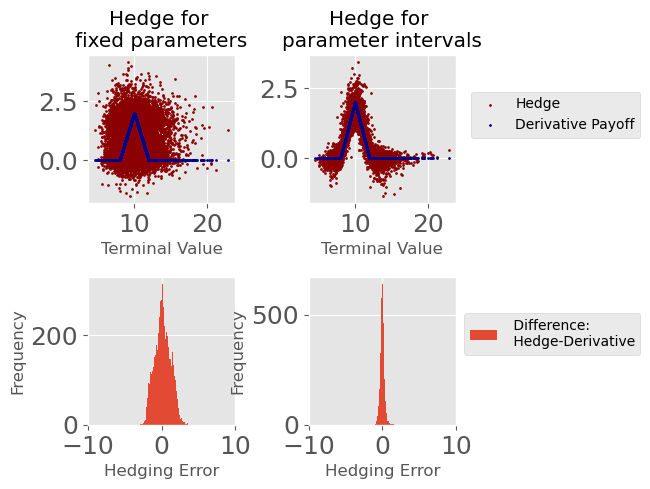

In [82]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = " Difference:\n Hedge-Derivative")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")
fig.savefig('eps/fig_butterfly_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

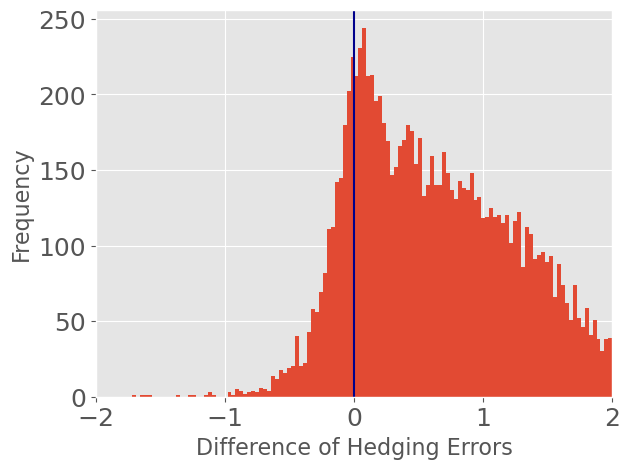

In [78]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_butterfly_difference.eps', format='eps')
plt.show()

Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [73]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,10000.000000
mean,0.876891
std,0.642417
min,0.000307
25%,0.320113
50%,0.768318
75%,1.337800
max,4.016726


Hedging Error of the robust strategy.

In [74]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,10000.000000
mean,0.217960
std,0.206383
min,0.000006
25%,0.074754
50%,0.161260
75%,0.298453
max,2.329733
